In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from glob import glob
import numpy as np
import os
import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile

In [ ]:
FOLDER_PATH = '/content/drive/My Drive/class/勞動部/week12/audio_classification'
paths = sorted(glob(os.path.join(FOLDER_PATH, 'audio10/*')))
len(paths)

400

### Raw signal

In [ ]:
# 音訊約有 44100 個點
path = paths[0]
sample_rate, samples = wavfile.read(path)
path, sample_rate, samples.shape

('/content/drive/My Drive/class/勞動部/week12/audio_classification/audio10/1-100032-A-0.wav',
 44100,
 (220500,))

In [ ]:
len(samples) / sample_rate # 總共有 5 second

5.0

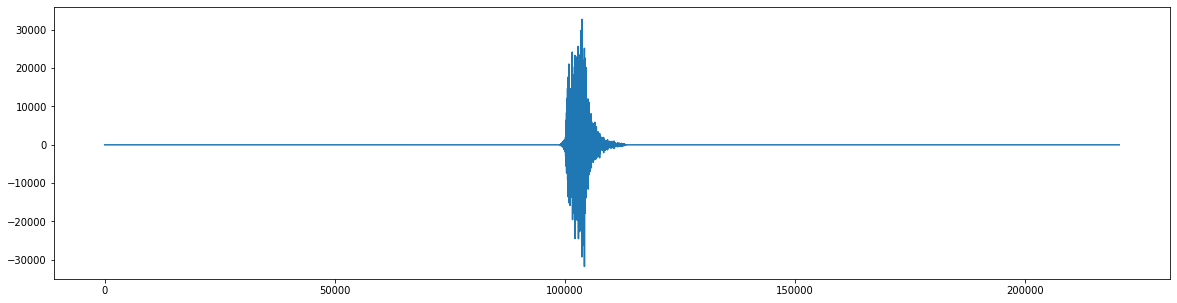

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(samples)

In [ ]:
# 振幅上下最大值 
np.min(samples), np.max(samples)

(-31732, 32730)

### Spectrogram

In [ ]:
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

In [ ]:
len(frequencies), frequencies[:3], frequencies[-3:]

(129,
 array([  0.      , 172.265625, 344.53125 ]),
 array([21705.46875 , 21877.734375, 22050.      ]))

In [ ]:
len(times), times[:3], times[-3:]

(984,
 array([0.00290249, 0.00798186, 0.01306122]),
 array([4.98575964, 4.990839  , 4.99591837]))

(0.0, 382907.47)

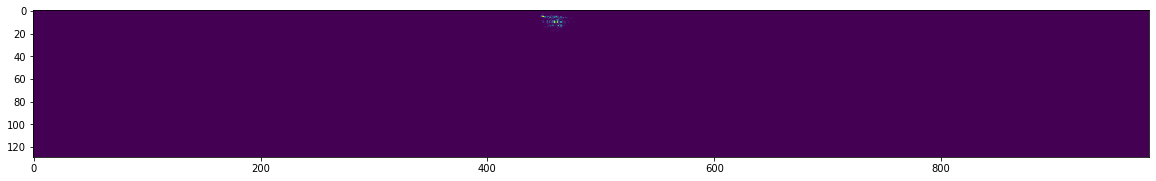

In [ ]:
plt.figure(figsize=(20,5))
plt.imshow(spectrogram)
np.min(spectrogram), np.max(spectrogram)

(-23.253496, 18.546637)

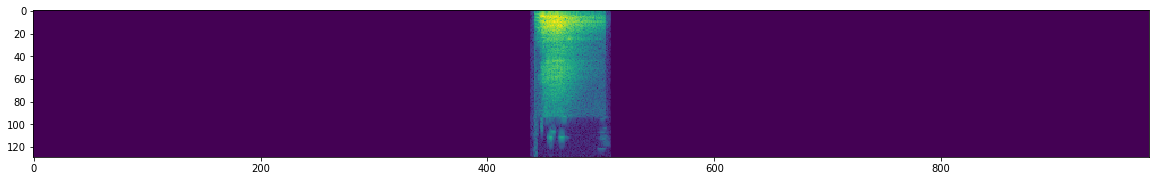

In [ ]:
log_spectrogram = np.log2(spectrogram + 1e-7)
plt.figure(figsize=(20,5))
plt.imshow(log_spectrogram)
np.min(log_spectrogram), np.max(log_spectrogram)

In [ ]:
spectrogram.shape

(129, 984)

In [ ]:
# audio 10 : https://drive.google.com/drive/folders/1ov1w9FVgXqHxE6TlSptA4ZNEjEIXAfUN
# data 路徑： https://drive.google.com/drive/folders/1KK__0pKmiCnrZB_px38wykSX1nhViQOp